In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from skimage.feature import hog
import cv2, os, glob, math
import scipy.spatial
from collections import Counter 

In [2]:
def create_data(filename, px):
    data = []
    for jpg in glob.glob("images/" + filename + "/*.jpg"):
        img = np.array(mpimg.imread(jpg))
        img = cv2.resize(img, (px, px))
        fd = hog(img)
        data.append(fd)
        
    return data

def data_split(rate, array):
    l = len(array)
    n_train = math.floor((1-rate) * l)
    train = array[:n_train]
    test = array[n_train:]
    
    return train, test

def create_label(array, label1, label2):
    l = len(array)
    new_array = []
    for i in range(l):
        if i < l/2:
            new_array.append(label1)
        else:
            new_array.append(label2)
    
    return new_array

In [7]:
data_tigers = create_data("tigers", 256)[:500]
data_dolphins = create_data("dolphins", 256)[:500]
train_tigers, test_tigers = data_split(0.1, data_tigers)
train_dolphins, test_dolphins = data_split(0.1, data_dolphins)
train_data = train_tigers + train_dolphins
test_data = test_tigers + test_dolphins
train_labels = create_label(train_data, "tiger", "dolphin")
test_labels = create_label(test_data, "tiger", "dolphin")

In [11]:
k = 1
ks = []
acc = []
while(k <= 31):
    final_output = []
    for i in range(len(test_data)):
        d = []
        votes = []
        for j in range(len(train_data)):
            dist = scipy.spatial.distance.euclidean(train_data[j] , test_data[i])
            d.append([dist, j])
        d.sort()
        d = d[0:k]
        for d, j in d:
            votes.append(train_labels[j])
        ans = Counter(votes).most_common(1)[0][0]
        final_output.append(ans)
        
        pred = np.array(final_output)
        test = np.array(test_labels)
        
    acc.append((pred == test).sum() / len(test))
    ks.append(k)
    k = k + 2

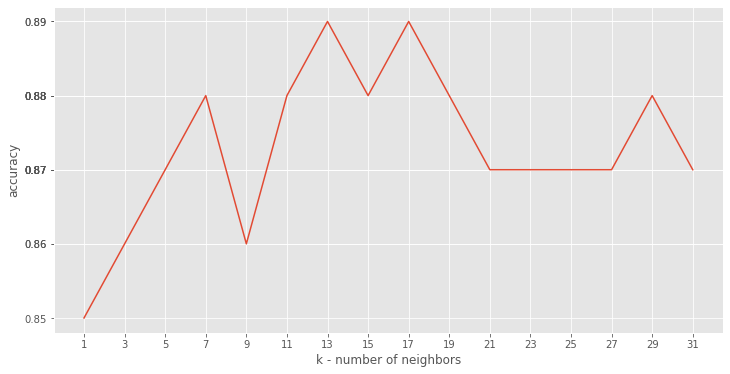

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(ks, acc)
plt.xticks(ks)
plt.yticks(acc)
plt.xlabel("k - number of neighbors")
plt.ylabel("accuracy")
plt.show()